## Tutorial #2: Visualize EEG Data

Main focus of this tutorial is visualization of eeg data. Various visualization strategies on an example dataset will be provided. Functions provided by 'viz' module of MNE package and Matplotlib library will be benefitted thoughrout this tutorial.  

In [ ]:
# For elimiating warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import mne

In [3]:
#Load epoched data
data_file = '../datasets/817_1_PDDys_ODDBALL_Clean_curated-epo'

# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif')

Reading ../../817_1_PDDys_ODDBALL_Clean_curated-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


Before any attempt to visualize data with MNE package, mne.viz module should be imported.

In [5]:
import mne.viz

### 1.) Basic Plotting with MNE

#### 1.1) Plot Sensors
The function named plot_sensors() plots the positions of sensors. The default plot kind is 'topomap' but it can be chageged if the 'kind' parameter is provided as either '3d' or 'select'. If 'select' is selected, this function will provide interactive sensor selecting dialog. By clicking while holding control key, channels can be selected. If any selection is made, this function returns a list containing selected channels together with the plot.   

Topomap reprensentation of sensor positions with plot_sensors() function

In [4]:
epochs.plot_sensors()

<Figure size 640x640 with 1 Axes>

<Figure size 640x640 with 1 Axes>

3D reprensentation of sensor locations with plot_sensors() function

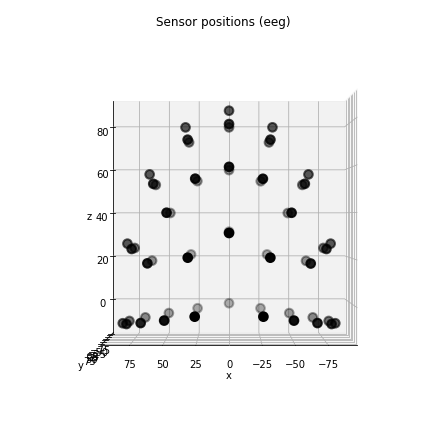

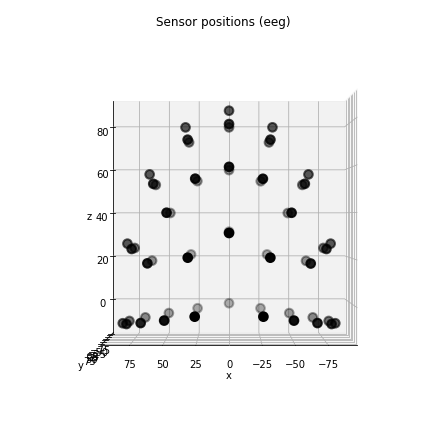

In [5]:
epochs.plot_sensors(kind='3d')

Plotting selected channels

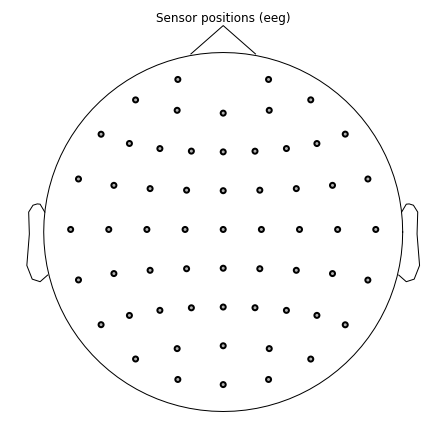

(<Figure size 432x432 with 1 Axes>, [])

In [6]:
epochs.plot_sensors(kind='select') # I couldn't manage to make it work interactively.

#### 1.2) Plot Events

Events can be plotted by plot_events() function of mne.viz module. All events or a group of events can be plotted with this function. pick_events() function of mne package enables us to inclue and/or exclude specific event types. It returns a list of events and this list can be passed to plot_events() function as a parameter. Note that, time is given in terms of samples not seconds.

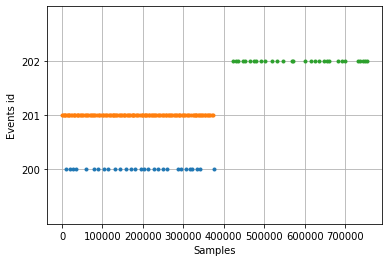

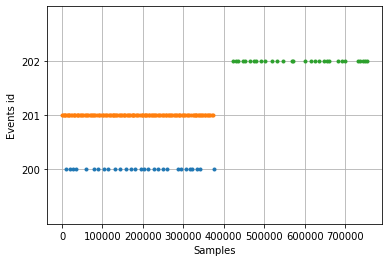

In [155]:
# Plotting rough timings for all event ids
all_events = epochs.events
mne.viz.plot_events(all_events)

{'Standard': 201, 'Target': 200, 'Novel': 202}
Total number of epochs in picked events: 59


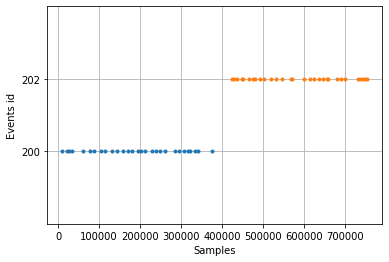

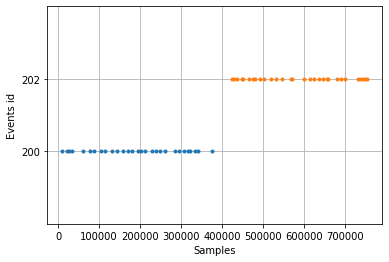

In [8]:
print(epochs.event_id)
picked_events = mne.pick_events(all_events, include=[200, 202], exclude=None)
print('Total number of epochs in picked events: ' + str(len(picked_events)))
mne.viz.plot_events(picked_events)

#### 1.3 Plot Epoched Data
plot() function plots epochs as its name indicates. y axis shows channel names while x axis is showing epoch numbers. Additionally above the plot, ratio of each event types are given as a summation. For example 0.69 * Standard + 0.15 * Target + 0.16 * Novel

Percentage of Standard events :  0.69
Percentage of Target events :  0.15
Percentage of Novel events :  0.16


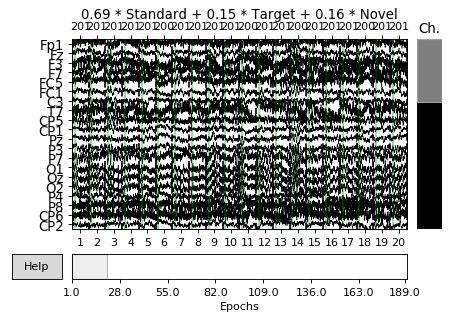

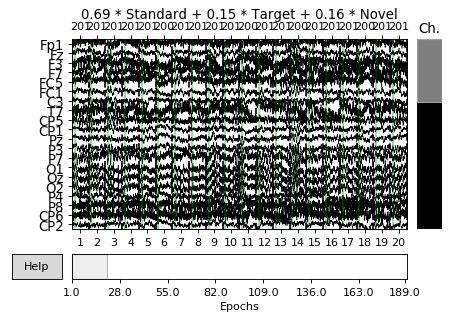

In [16]:
import numpy as np
print('Percentage of Standard events : ', np.around(len(epochs['Standard'])/len(epochs), decimals=2))
print('Percentage of Target events : ',np.around(len(epochs['Target'])/len(epochs), decimals=2))
print('Percentage of Novel events : ', np.around(len(epochs['Novel'])/len(epochs), decimals=2))
epochs.plot()

#### 1.4) Plot Evoked Data

In the following example, ERP of standard condtion is plotted by plot() function of evoked object.

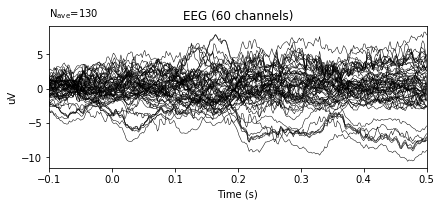

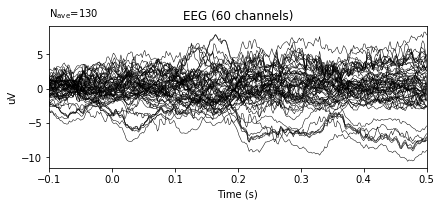

In [11]:
epochs['Standard'].average().plot()

Evoked data can be plotted via matplotlib library too. In the following example ERP of each condition at channel 18 is provided. As the plot points out, the responses that is collected from channel 18 are different for each condition.

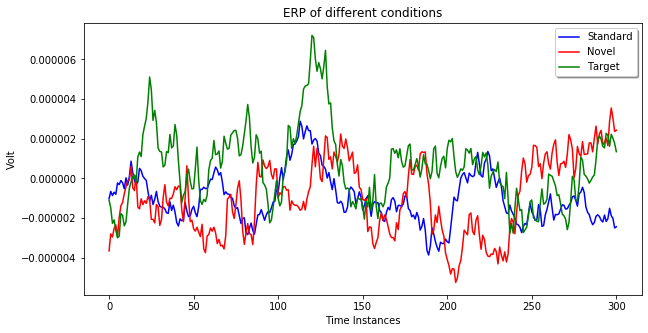

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

st = epochs['Standard']
nv = epochs['Novel']
tg = epochs['Target']
ch = 18
conditions = ['Standard', 'Novel', 'Target']

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time Instances')
ax.set_ylabel('Volt')

ax.plot(st.average().data[ch, :], color='blue', label='Standard')
ax.plot(nv.average().data[ch, :], color='red', label='Novel')
ax.plot(tg.average().data[ch, :], color='green', label='Target')

legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
plt.title('ERP of different conditions')
plt.show()



#### 1.5) Topographies
Topographic plots show the voltage values at each channel on a scalp. It is similar to heat map where different voltage ranges are represented with different colors. In MNE package, evoked class has a function named plot_topomap() which takes a time range and type of the channels as parameters and it plots the a topographic map with given data. On the right side of the plot, a color map is provided to undertand the volt ranges that each color represents. Dots on the scalp figures show the location of electrodes.

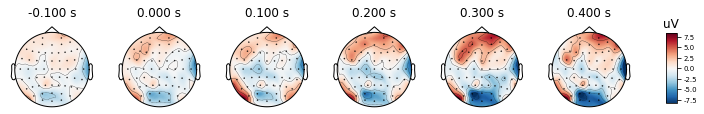

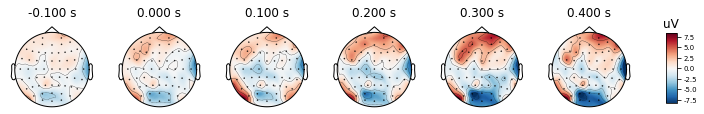

In [18]:
import numpy as np 
%matplotlib inline
times = np.arange(-0.1, 0.5, 0.1)
epochs.average().plot_topomap(times, ch_type='eeg')

### 2.) Baseline Correction

 Because of the changes in experiment conditions, the actual form of the signal may drift away. Various internal and external sources may cause this drift and it may vary among electrodes. Although various approaches exist for baseline correction, the traditional way is subtracting the mean of a baseline period from the initial signal. In other words, the average voltage values of each electrode is calculated within a time interval and then this average is substracted from that time interval of the signal.

#### Baseline Correction In MNE:
To apply baseline correction in MNE, a time interval should be passed as a paramenter to apply_baseline() function of epochs object. If 'None' is given as time interval, baseline correction will not be applied. To apply baseline correction to the all time interval, (None,None) should be used. This function returns baseline-corrected epochs object and note that it modifies the the object as well. 

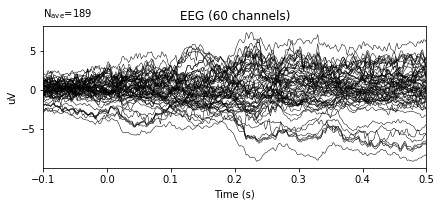

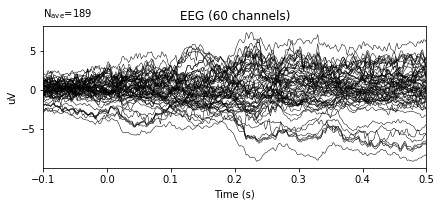

In [32]:
# Plot of initial evoked object
epochs.average().plot()

As mentioned before, the initial signal will be modified by baseline correction. If you want to keep the initial epoch object without any change it should be copied to another variable before calling apply_baseline() function. Otherwise it will be lost. In python, shallow copies can be modified when the original object is modified. However, deep copies are independent from the original object. So, in our case we need a deep copy of epochs object.

Applying baseline correction (mode: mean)


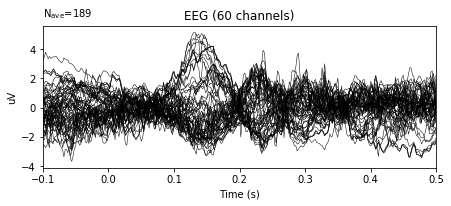

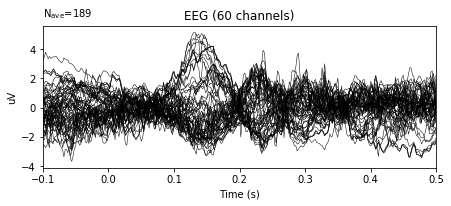

In [33]:
import copy
epochs_wo_bc = copy.deepcopy(epochs)
# baseline correction
bc_epochs = epochs.apply_baseline((None,None))

# Plot of baseline-corrected evoked signal
bc_epochs.average().plot()

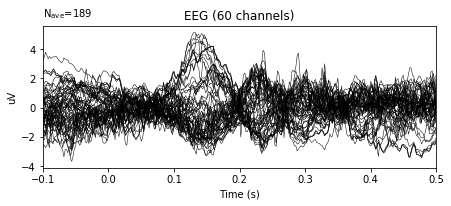

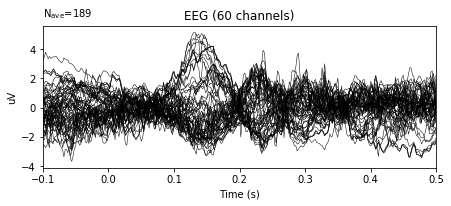

In [34]:
#Modified evoked object
epochs.average().plot()

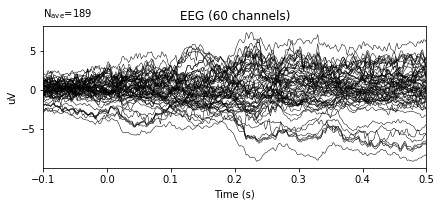

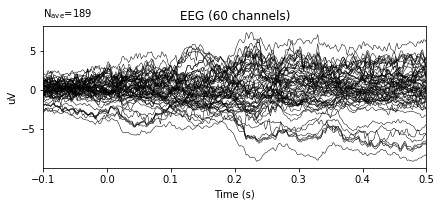

In [41]:
epochs_wo_bc.average().plot()

In the example above, the variance in the amplitudes of given signal decreased significantly.  

Alternatively a similar observation can be made via plots that show single trials and the average as in the plots below. In these plots black line represents the average and the rest is single trials. 

Note that these plots are drawn by using Matplotlib library of Python.

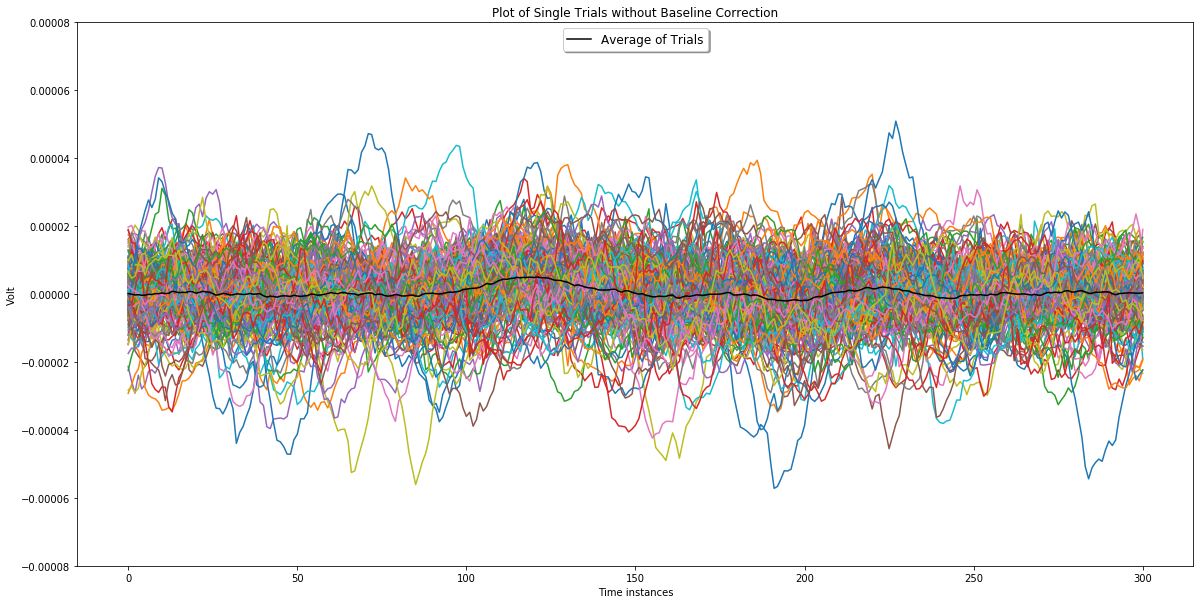

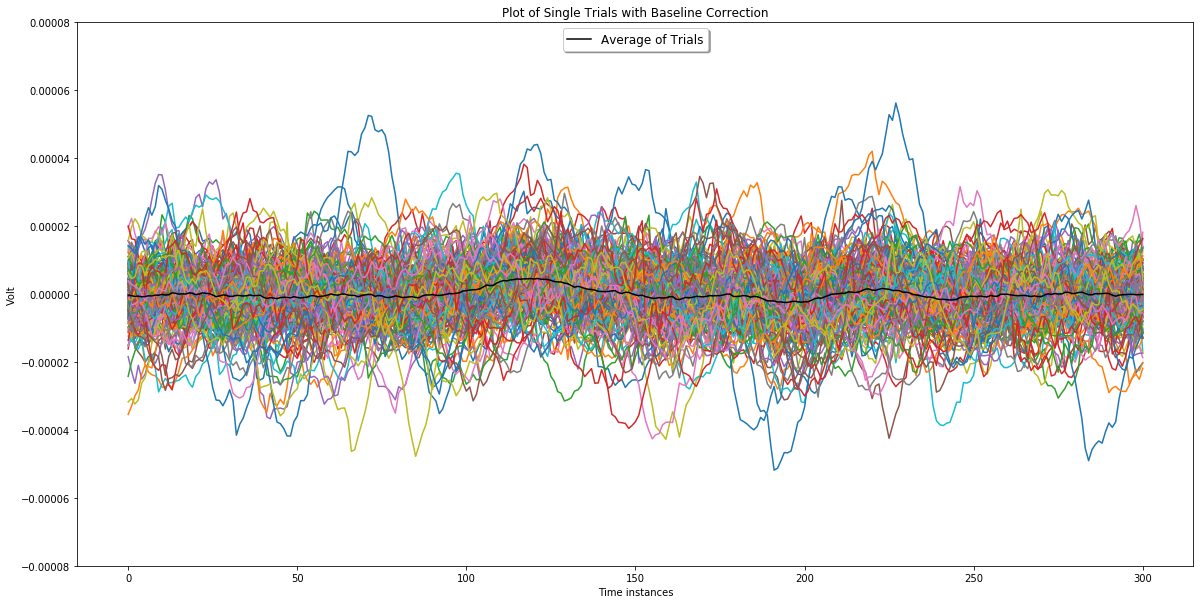

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
ch = 47 # channel index
data_types = ['original', 'bc']

for i in range(len(data_types)):

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlabel('Time instances')
    ax.set_ylabel('Volt')
    plt.ylim(-0.00008, 0.00008) 
    if data_types[i] == 'bc': 
        plt.title('Plot of Single Trials with Baseline Correction')
        for i in range(len(bc_epochs.get_data())):   
            ax.plot(bc_epochs.get_data()[i,ch,:])
        ax.plot(bc_epochs.average().data[ch,:], color='black', label='Average of Trials')
    
    else:
        plt.title('Plot of Single Trials without Baseline Correction')
        for i in range(len(epochs_wo_bc.get_data())):   
            ax.plot(epochs_wo_bc.get_data()[i,ch,:])
        ax.plot(epochs_wo_bc.average().data[ch,:], color='black', label='Average of Trials')

    legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
    plt.show()

In the above plot, the effect of baseline correction seems to have not significant but if you have a closer look  the variance in amplitudes are decreased. The reason for not having an obvious change is that the ERP which is the mean of epoches is not very strong. If we have a stronger ERP signal, then difference between two plots would be clearer.